# **The fifth in-class-exercise (40 points in total, 4/18/2023)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

(7) Word2Vec

(8) BERT

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [2]:
#Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score




## Reading the train dataset

In [3]:
with open("stsa-train.txt") as txtf:
    mylist = [line.rstrip('\n') for line in txtf]
    
labels = []
text = []

for i, line in enumerate(mylist):
    label = mylist[i][0]
    tex = mylist[i][1:]
    labels.append(label)
    text.append(tex)

train_dataset = pd.DataFrame(list(zip(labels, text)),columns =['Reviews', 'Text'])
train_dataset.head()

,Reviews,Text
0,1,"a stirring , funny and finally transporting r..."
1,0,apparently reassembled from the cutting-room ...
2,0,they presume their audience wo n't sit still ...
3,1,this is a visually stunning rumination on lov...
4,1,jonathan parker 's bartleby should have been ...


## Preprocessing of Training Dataset

In [4]:
import nltk
nltk.download()
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)


train_dataset['cleanText']=train_dataset['Text'].map(lambda s:preprocess(s)) 
train_dataset.head()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


,Reviews,Text,cleanText
0,1,"a stirring , funny and finally transporting r...",stirring funny finally transporting imagining ...
1,0,apparently reassembled from the cutting-room ...,apparently reassembled cutting room floor give...
2,0,they presume their audience wo n't sit still ...,presume audience sit still sociology lesson ho...
3,1,this is a visually stunning rumination on lov...,visually stunning rumination love memory histo...
4,1,jonathan parker 's bartleby should have been ...,jonathan parker bartleby end modern office ano...


## Reading the test dataset

In [5]:
with open("stsa-test.txt") as txtf:
    mylist_test_data = [line.rstrip('\n') for line in txtf]
    
labels_test = []
text_test = []

for i, line in enumerate(mylist_test_data):
    label_test = mylist_test_data[i][0]
    tex_test = mylist_test_data[i][1:]
    labels_test.append(label_test)
    text_test.append(tex_test)

test_dataset = pd.DataFrame(list(zip(labels_test, text_test)),columns =['Reviews', 'Text'])
test_dataset.head()


,Reviews,Text
0,0,"no movement , no yuks , not much of anything ."
1,0,"a gob of drivel so sickly sweet , even the ea..."
2,0,"gangs of new york is an unapologetic mess , w..."
3,0,we never really feel involved with the story ...
4,1,this is one of polanski 's best films .


## Preprocessing of Training Dataset

In [6]:
test_dataset['cleanText']=test_dataset['Text'].map(lambda s:preprocess(s)) 
test_dataset.head()


,Reviews,Text,cleanText
0,0,"no movement , no yuks , not much of anything .",movement yuks much anything
1,0,"a gob of drivel so sickly sweet , even the ea...",gob drivel sickly sweet even eager consumers m...
2,0,"gangs of new york is an unapologetic mess , w...",gangs new york unapologetic mess whose saving ...
3,0,we never really feel involved with the story ...,never really feel involved story ideas remain ...
4,1,this is one of polanski 's best films .,one polanski best films


## TF-IDF Vectorization


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer 

tfidf_vectorizer = TfidfVectorizer(lowercase = False, analyzer='word')
tfIDF_train = tfidf_vectorizer.fit_transform(train_dataset["cleanText"]).toarray()
tfIDF_test = tfidf_vectorizer.transform(test_dataset["cleanText"]).toarray()


In [8]:
x_test = tfIDF_test
y_test = test_dataset["Reviews"]

## Data partitioning


In [9]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(tfIDF_train,train_dataset["Reviews"],test_size = 0.2, random_state = 85)


## Testing with Algorithms

## 1. MultinominalNB (Multinominal Naive Bayes)

In [10]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_model = nb_classifier.fit(x_train, y_train) 
predictions_validation_set = nb_classifier.predict(x_valid) 


from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print ("Accuracy of Multinominal  Naive Bayes model  : ", round(accuracy_score(y_valid, predictions_validation_set)*100),"%")
print ("Percision of Multinominal Naive Bayes model  : ", round(precision_score(y_valid, predictions_validation_set, pos_label='0')*100),"%")
print ("Recall of Multinominal Naive Bayes model  : ", round(recall_score(y_valid, predictions_validation_set, pos_label='0')*100),"%")
print ("F1 Score of Multinominal Naive Bayes model  : ", round(f1_score(y_valid, predictions_validation_set, pos_label='0')*100),"%")

Accuracy of Multinominal  Naive Bayes model  :  78 %
Percision of Multinominal Naive Bayes model  :  83 %
Recall of Multinominal Naive Bayes model  :  67 %
F1 Score of Multinominal Naive Bayes model  :  75 %


In [11]:
from sklearn.metrics import classification_report

classification_Report_naive_bayes = classification_report(y_valid, predictions_validation_set)
print("Classification Report: ", "\n", "\n",classification_Report_naive_bayes)


Classification Report:  
 
               precision    recall  f1-score   support

           0       0.83      0.67      0.75       650
           1       0.75      0.88      0.81       734

    accuracy                           0.78      1384
   macro avg       0.79      0.78      0.78      1384
weighted avg       0.79      0.78      0.78      1384



In [12]:
from sklearn.model_selection import cross_val_score
naive_accuracies_validation = cross_val_score(estimator = nb_classifier, X = x_train, y = y_train, cv = 10)

print(f"Naive Bayes Model  10-fold cross validation score on training set is :  {round(naive_accuracies_validation.mean()*100)}%")


Naive Bayes Model  10-fold cross validation score on training set is :  78%


In [13]:
predictions_test_set = nb_classifier.predict(x_test) 
print ("Accuracy of the Naive Bayes model on test set is : ", round(accuracy_score(y_test, predictions_test_set)*100),"%")
print ("Percision of the Naive Bayes model on validation set is : ", round(precision_score(y_test, predictions_test_set, pos_label='0')*100),"%")
print ("Recall of the Naive Bayes model on validation set is : ", round(recall_score(y_test, predictions_test_set, pos_label='0')*100),"%")
print ("F1 Score of the Naive Bayes model on validation set is : ", round(f1_score(y_test, predictions_test_set, pos_label='0')*100),"%")


Accuracy of the Naive Bayes model on test set is :  80 %
Percision of the Naive Bayes model on validation set is :  86 %
Recall of the Naive Bayes model on validation set is :  71 %
F1 Score of the Naive Bayes model on validation set is :  78 %


In [14]:
classification_Report_naive_bayes_Test_data = classification_report(y_test, predictions_test_set)
print("Classification Report: ", "\n", "\n",classification_Report_naive_bayes_Test_data)


Classification Report:  
 
               precision    recall  f1-score   support

           0       0.86      0.71      0.78       912
           1       0.75      0.88      0.81       909

    accuracy                           0.80      1821
   macro avg       0.81      0.80      0.80      1821
weighted avg       0.81      0.80      0.80      1821



In [15]:
naive_accuracies_test = cross_val_score(estimator = nb_classifier, X = x_test, y = y_test, cv = 10)

print(f"Naive Bayes Model 10-fold cross validation score on testing set is :  {round(naive_accuracies_test.mean()*100)}%")

Naive Bayes Model 10-fold cross validation score on testing set is :  73%


## Support Vector Machine

In [16]:
from sklearn import svm
classifier_svm = svm.SVC()
model_svm = classifier_svm.fit(x_train, y_train) 
svm_predictions_validation_set = classifier_svm.predict(x_valid) 

In [17]:
print ("Accuracy of the SVM model on validation set is : ", round(accuracy_score(y_valid, svm_predictions_validation_set)*100),"%")
print ("Percision of the SVM model on validation set is : ", round(precision_score(y_valid, svm_predictions_validation_set, pos_label='0')*100),"%")
print ("Recall of the SVM model on validation set is : ", round(recall_score(y_valid, svm_predictions_validation_set, pos_label='0')*100),"%")
print ("F1 Score of the SVM model on validation set is : ", round(f1_score(y_valid, svm_predictions_validation_set, pos_label='0')*100),"%")

Accuracy of the SVM model on validation set is :  79 %
Percision of the SVM model on validation set is :  80 %
Recall of the SVM model on validation set is :  75 %
F1 Score of the SVM model on validation set is :  77 %


In [18]:
from sklearn.metrics import classification_report

svm_validation_Classification_report = classification_report(y_valid, svm_predictions_validation_set)
print("Classification Report: ", "\n", "\n",svm_validation_Classification_report)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.80      0.75      0.77       650
           1       0.79      0.83      0.81       734

    accuracy                           0.79      1384
   macro avg       0.79      0.79      0.79      1384
weighted avg       0.79      0.79      0.79      1384



In [ ]:
from sklearn.model_selection import cross_val_score
svm_accuracies_validation = cross_val_score(estimator = classifier_svm, X = x_train, y = y_train, cv = 10)

print(f"SVM Model  10-fold cross validation score on training set is :  {round(svm_accuracies_validation.mean()*100)}%")

SVM Model  10-fold cross validation score on training set is :  77%


In [ ]:
svm_predictions_test_set = classifier_svm.predict(x_test) 
print ("Accuracy of the SVM model on test set is : ", round(accuracy_score(y_test, svm_predictions_test_set)*100),"%")
print ("Percision of the SVM model on validation set is : ", round(precision_score(y_test, svm_predictions_test_set, pos_label='0')*100),"%")
print ("Recall of the SVM model on validation set is : ", round(recall_score(y_test, svm_predictions_test_set, pos_label='0')*100),"%")
print ("F1 Score of the SVM model on validation set is : ", round(f1_score(y_test, svm_predictions_test_set, pos_label='0')*100),"%")

Accuracy of the SVM model on test set is :  79 %
Percision of the SVM model on validation set is :  82 %
Recall of the SVM model on validation set is :  75 %
F1 Score of the SVM model on validation set is :  78 %


In [ ]:
svm_predictions_test_set = classifier_svm.predict(x_test) 
print ("Accuracy of the SVM model on test set is : ", round(accuracy_score(y_test, svm_predictions_test_set)*100),"%")
print ("Percision of the SVM model on validation set is : ", round(precision_score(y_test, svm_predictions_test_set, pos_label='0')*100),"%")
print ("Recall of the SVM model on validation set is : ", round(recall_score(y_test, svm_predictions_test_set, pos_label='0')*100),"%")
print ("F1 Score of the SVM model on validation set is : ", round(f1_score(y_test, svm_predictions_test_set, pos_label='0')*100),"%")

In [ ]:
svm_test_validation_Classification_report = classification_report(y_test, svm_predictions_test_set)
print("Classification Report: ", "\n", "\n",svm_test_validation_Classification_report)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.82      0.75      0.78       912
           1       0.77      0.84      0.80       909

    accuracy                           0.79      1821
   macro avg       0.80      0.79      0.79      1821
weighted avg       0.80      0.79      0.79      1821



In [ ]:
svm_accuracies_test = cross_val_score(estimator = classifier_svm, X = x_test, y = y_test, cv = 10)

print(f"SVM Model 10-fold cross validation score on testing set is :  {round(svm_accuracies_test.mean()*100)}%")

SVM Model 10-fold cross validation score on testing set is :  72%


## KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier

classifier_knn = KNeighborsClassifier(n_neighbors = 15)
model_knn = classifier_knn.fit(x_train, y_train) 
knn_predictions_validation_set = classifier_knn.predict(x_valid) 

print ("Accuracy of the KNN model on validation set is : ", round(accuracy_score(y_valid, knn_predictions_validation_set)*100),"%")
print ("Percision of the KNN model on validation set is : ", round(precision_score(y_valid, knn_predictions_validation_set, pos_label='0')*100),"%")
print ("Recall of the KNN model on validation set is : ", round(recall_score(y_valid, knn_predictions_validation_set, pos_label='0')*100),"%")
print ("F1 Score of the KNN model on validation set is : ", round(f1_score(y_valid, knn_predictions_validation_set, pos_label='0')*100),"%")

Accuracy of the KNN model on validation set is :  70 %
Percision of the KNN model on validation set is :  64 %
Recall of the KNN model on validation set is :  81 %
F1 Score of the KNN model on validation set is :  72 %


In [23]:
from sklearn.metrics import classification_report

knn_validation_Classification_report = classification_report(y_valid, knn_predictions_validation_set)
print("Classification Report: ", "\n", "\n",knn_validation_Classification_report)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.64      0.81      0.72       650
           1       0.78      0.60      0.68       734

    accuracy                           0.70      1384
   macro avg       0.71      0.70      0.70      1384
weighted avg       0.72      0.70      0.70      1384



In [24]:
from sklearn.model_selection import cross_val_score
knn_accuracies_validation = cross_val_score(estimator = classifier_knn, X = x_train, y = y_train, cv = 10)

print(f"KNN Model  10-fold cross validation score on training set is :  {round(knn_accuracies_validation.mean()*100)}%")

KNN Model  10-fold cross validation score on training set is :  71%


In [25]:
knn_predictions_test_set = classifier_knn.predict(x_test) 
print ("Accuracy of the KNN model on test set is : ", round(accuracy_score(y_test, knn_predictions_test_set)*100),"%")
print ("Percision of the KNN model on validation set is : ", round(precision_score(y_test, knn_predictions_test_set, pos_label='0')*100),"%")
print ("Recall of the KNN model on validation set is : ", round(recall_score(y_test, knn_predictions_test_set, pos_label='0')*100),"%")
print ("F1 Score of the KNN model on validation set is : ", round(f1_score(y_test, knn_predictions_test_set, pos_label='0')*100),"%")

Accuracy of the KNN model on test set is :  73 %
Percision of the KNN model on validation set is :  68 %
Recall of the KNN model on validation set is :  86 %
F1 Score of the KNN model on validation set is :  76 %


In [26]:
knn_test_validation_Classification_report = classification_report(y_test, knn_predictions_test_set)
print("Classification Report: ", "\n", "\n",knn_test_validation_Classification_report)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.68      0.86      0.76       912
           1       0.80      0.60      0.69       909

    accuracy                           0.73      1821
   macro avg       0.74      0.73      0.72      1821
weighted avg       0.74      0.73      0.72      1821



In [27]:
knn_accuracies_test = cross_val_score(estimator = classifier_knn, X = x_test, y = y_test, cv = 10)

print(f"KNN Model 10-fold cross validation score on testing set is :  {round(knn_accuracies_test.mean()*100)}%")

KNN Model 10-fold cross validation score on testing set is :  63%


## Decison Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

classifier_dt = DecisionTreeClassifier()
model_dt = classifier_dt.fit(x_train, y_train) 
dt_predictions_validation_set = classifier_dt.predict(x_valid) 

print ("Accuracy of the Decison Tree Classifier model on validation set is : ", round(accuracy_score(y_valid, dt_predictions_validation_set)*100),"%")
print ("Percision of the Decison Tree Classifier model on validation set is : ", round(precision_score(y_valid, dt_predictions_validation_set, pos_label='0')*100),"%")
print ("Recall of the Decison Tree Classifier model on validation set is : ", round(recall_score(y_valid, dt_predictions_validation_set, pos_label='0')*100),"%")
print ("F1 Score of the Decison Tree Classifier model on validation set is : ", round(f1_score(y_valid, dt_predictions_validation_set, pos_label='0')*100),"%")

Accuracy of the Decison Tree Classifier model on validation set is :  65 %
Percision of the Decison Tree Classifier model on validation set is :  62 %
Recall of the Decison Tree Classifier model on validation set is :  66 %
F1 Score of the Decison Tree Classifier model on validation set is :  64 %


In [29]:
from sklearn.metrics import classification_report

dt_validation_Classification_report = classification_report(y_valid, dt_predictions_validation_set)
print("Classification Report: ", "\n", "\n",dt_validation_Classification_report)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.62      0.66      0.64       650
           1       0.68      0.65      0.66       734

    accuracy                           0.65      1384
   macro avg       0.65      0.65      0.65      1384
weighted avg       0.65      0.65      0.65      1384



In [30]:
dt_predictions_test_set = classifier_dt.predict(x_test) 
print ("Accuracy of the Decison Tree Classifier model on test set is : ", round(accuracy_score(y_test, dt_predictions_test_set)*100),"%")
print ("Percision of the Decison Tree Classifier model on validation set is : ", round(precision_score(y_test, dt_predictions_test_set, pos_label='0')*100),"%")
print ("Recall of the Decison Tree Classifier model on validation set is : ", round(recall_score(y_test, dt_predictions_test_set, pos_label='0')*100),"%")
print ("F1 Score of the Decison Tree Classifier model on validation set is : ", round(f1_score(y_test, dt_predictions_test_set, pos_label='0')*100),"%")

Accuracy of the Decison Tree Classifier model on test set is :  67 %
Percision of the Decison Tree Classifier model on validation set is :  67 %
Recall of the Decison Tree Classifier model on validation set is :  68 %
F1 Score of the Decison Tree Classifier model on validation set is :  68 %


In [31]:
dt_validation_Classification_report_test = classification_report(y_test, dt_predictions_test_set)
print("Classification Report: ", "\n", "\n",dt_validation_Classification_report_test)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.67      0.68      0.68       912
           1       0.67      0.66      0.67       909

    accuracy                           0.67      1821
   macro avg       0.67      0.67      0.67      1821
weighted avg       0.67      0.67      0.67      1821



In [32]:
dt_accuracies_test = cross_val_score(estimator = classifier_dt, X = x_test, y = y_test, cv = 10)

print(f"Decison Tree Classifier Model 10-fold cross validation score on testing set is :  {round(dt_accuracies_test.mean()*100)}%")

Decison Tree Classifier Model 10-fold cross validation score on testing set is :  61%


In [33]:
from sklearn.model_selection import cross_val_score
dt_accuracies_validation = cross_val_score(estimator = classifier_dt, X = x_train, y = y_train, cv = 10)

print(f"Decison Tree Classifier Model  10-fold cross validation score on training set is :  {round(dt_accuracies_validation.mean()*100)}%")

Decison Tree Classifier Model  10-fold cross validation score on training set is :  65%


## Randomforest

In [34]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier()
model_rf = classifier_rf.fit(x_train, y_train) 
rf_predictions_validation_set = classifier_rf.predict(x_valid) 

print ("Accuracy of the Random Forest Classifier model on validation set is : ", round(accuracy_score(y_valid, rf_predictions_validation_set)*100),"%")
print ("Percision of the Random Forest Classifier model on validation set is : ", round(precision_score(y_valid, rf_predictions_validation_set, pos_label='0')*100),"%")
print ("Recall of the Random Forest Classifier model on validation set is : ", round(recall_score(y_valid, rf_predictions_validation_set, pos_label='0')*100),"%")
print ("F1 Score of the Random Forest Classifier model on validation set is : ", round(f1_score(y_valid, rf_predictions_validation_set, pos_label='0')*100),"%")

Accuracy of the Random Forest Classifier model on validation set is :  75 %
Percision of the Random Forest Classifier model on validation set is :  72 %
Recall of the Random Forest Classifier model on validation set is :  76 %
F1 Score of the Random Forest Classifier model on validation set is :  74 %


In [35]:
from sklearn.metrics import classification_report

rf_validation_Classification_report = classification_report(y_valid, rf_predictions_validation_set)
print("Classification Report: ", "\n", "\n",rf_validation_Classification_report)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.72      0.76      0.74       650
           1       0.77      0.73      0.75       734

    accuracy                           0.75      1384
   macro avg       0.75      0.75      0.75      1384
weighted avg       0.75      0.75      0.75      1384



In [36]:
from sklearn.model_selection import cross_val_score
rf_accuracies_validation = cross_val_score(estimator = classifier_rf, X = x_train, y = y_train, cv = 10)

print(f"Decison Random Forest Model  10-fold cross validation score on training set is :  {round(rf_accuracies_validation.mean()*100)}%")

Decison Random Forest Model  10-fold cross validation score on training set is :  72%


In [37]:
rf_predictions_test_set = classifier_rf.predict(x_test) 
print ("Accuracy of the Random Forest Classifier model on test set is : ", round(accuracy_score(y_test, rf_predictions_test_set)*100),"%")
print ("Percision of the Random Forest Classifier model on validation set is : ", round(precision_score(y_test, rf_predictions_test_set, pos_label='0')*100),"%")
print ("Recall of the Random Forest Classifier model on validation set is : ", round(recall_score(y_test, rf_predictions_test_set, pos_label='0')*100),"%")
print ("F1 Score of the Random Forest Classifier model on validation set is : ", round(f1_score(y_test, rf_predictions_test_set, pos_label='0')*100),"%")

Accuracy of the Random Forest Classifier model on test set is :  75 %
Percision of the Random Forest Classifier model on validation set is :  74 %
Recall of the Random Forest Classifier model on validation set is :  79 %
F1 Score of the Random Forest Classifier model on validation set is :  76 %


In [38]:
rf_validation_Classification_report_test = classification_report(y_test, rf_predictions_test_set)
print("Classification Report: ", "\n", "\n",rf_validation_Classification_report_test)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.74      0.79      0.76       912
           1       0.77      0.72      0.75       909

    accuracy                           0.75      1821
   macro avg       0.76      0.75      0.75      1821
weighted avg       0.75      0.75      0.75      1821



In [39]:
rf_accuracies_test = cross_val_score(estimator = classifier_rf, X = x_test, y = y_test, cv = 10)

print(f"Random Forest Classifier Model 10-fold cross validation score on testing set is :  {round(rf_accuracies_test.mean()*100)}%")

Random Forest Classifier Model 10-fold cross validation score on testing set is :  65%


In [40]:
from sklearn.model_selection import cross_val_score
rf_accuracies_validation = cross_val_score(estimator = classifier_rf, X = x_train, y = y_train, cv = 10)

print(f"Decison Random Forest Model  10-fold cross validation score on training set is :  {round(rf_accuracies_validation.mean()*100)}%")

rf_predictions_test_set = classifier_rf.predict(x_test) 
print ("Accuracy of the Random Forest Classifier model on test set is : ", round(accuracy_score(y_test, rf_predictions_test_set)*100),"%")
print ("Percision of the Random Forest Classifier model on validation set is : ", round(precision_score(y_test, rf_predictions_test_set, pos_label='0')*100),"%")
print ("Recall of the Random Forest Classifier model on validation set is : ", round(recall_score(y_test, rf_predictions_test_set, pos_label='0')*100),"%")
print ("F1 Score of the Random Forest Classifier model on validation set is : ", round(f1_score(y_test, rf_predictions_test_set, pos_label='0')*100),"%")

cr_rf_test = classification_report(y_test, rf_predictions_test_set)
print("Classification Report: ", "\n", "\n",cr_rf_test)

rf_accuracies_test = cross_val_score(estimator = classifier_rf, X = x_test, y = y_test, cv = 10)

print(f"Random Forest Classifier Model 10-fold cross validation score on testing set is :  {round(rf_accuracies_test.mean()*100)}%")

Decison Random Forest Model  10-fold cross validation score on training set is :  72%
Accuracy of the Random Forest Classifier model on test set is :  75 %
Percision of the Random Forest Classifier model on validation set is :  74 %
Recall of the Random Forest Classifier model on validation set is :  79 %
F1 Score of the Random Forest Classifier model on validation set is :  76 %
Classification Report:  
 
               precision    recall  f1-score   support

           0       0.74      0.79      0.76       912
           1       0.77      0.72      0.75       909

    accuracy                           0.75      1821
   macro avg       0.76      0.75      0.75      1821
weighted avg       0.75      0.75      0.75      1821

Random Forest Classifier Model 10-fold cross validation score on testing set is :  65%


## XGBoost

In [ ]:
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier()
model_xgb = classifier_xgb.fit(x_train, y_train) 
xgb_predictions_validation_set = classifier_xgb.predict(x_valid) 

print ("Accuracy of the XGBoost Classifier model on validation set is : ", round(accuracy_score(y_valid, xgb_predictions_validation_set)*100),"%")
print ("Percision of the XGBoost Classifier model on validation set is : ", round(precision_score(y_valid, xgb_predictions_validation_set, pos_label='0')*100),"%")
print ("Recall of the XGBoost Classifier model on validation set is : ", round(recall_score(y_valid, xgb_predictions_validation_set, pos_label='0')*100),"%")
print ("F1 Score of the XGBoost Classifier model on validation set is : ", round(f1_score(y_valid, xgb_predictions_validation_set, pos_label='0')*100),"%")

C:\Users\nishi\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\nishi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:23:02] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of the XGBoost Classifier model on validation set is :  69 %
Percision of the XGBoost Classifier model on validation set is :  72 %
Recall of the XGBoost Classifier model on validation set is :  58 %
F1 Score of the XGBoost Classifier model on validation set is :  64 %


In [ ]:
from sklearn.metrics import classification_report

cr_xgb_validation = classification_report(y_valid, xgb_predictions_validation_set)
print("Classification Report: ", "\n", "\n",cr_xgb_validation)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.72      0.58      0.64       667
           1       0.67      0.79      0.73       717

    accuracy                           0.69      1384
   macro avg       0.69      0.68      0.68      1384
weighted avg       0.69      0.69      0.68      1384



In [ ]:
from sklearn.model_selection import cross_val_score
xgb_accuracies_validation = cross_val_score(estimator = classifier_xgb, X = x_train, y = y_train, cv = 10)

print(f"XGBoost Model  10-fold cross validation score on training set is :  {round(xgb_accuracies_validation.mean()*100)}%")

C:\Users\nishi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:24:10] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nishi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:24:53] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nishi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:25:39] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nishi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:26:31] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nishi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:27:21] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nishi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:28:09] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nishi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:28:59] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nishi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:29:52] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nishi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:30:45] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nishi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:31:40] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Model  10-fold cross validation score on training set is :  69%


In [ ]:
xgb_predictions_test_set = classifier_xgb.predict(x_test) 
print ("Accuracy of the XGBoost Classifier model on test set is : ", round(accuracy_score(y_test, xgb_predictions_test_set)*100),"%")
print ("Percision of the XGBoost Classifier model on validation set is : ", round(precision_score(y_test, xgb_predictions_test_set, pos_label='0')*100),"%")
print ("Recall of the XGBoost Classifier model on validation set is : ", round(recall_score(y_test, xgb_predictions_test_set, pos_label='0')*100),"%")
print ("F1 Score of the XGBoost Classifier model on validation set is : ", round(f1_score(y_test, xgb_predictions_test_set, pos_label='0')*100),"%")

Accuracy of the XGBoost Classifier model on test set is :  70 %
Percision of the XGBoost Classifier model on validation set is :  75 %
Recall of the XGBoost Classifier model on validation set is :  60 %
F1 Score of the XGBoost Classifier model on validation set is :  67 %


In [ ]:
cr_xgb_test = classification_report(y_test, xgb_predictions_test_set)
print("Classification Report: ", "\n", "\n",cr_xgb_test)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.75      0.60      0.67       912
           1       0.67      0.79      0.72       909

    accuracy                           0.70      1821
   macro avg       0.71      0.70      0.70      1821
weighted avg       0.71      0.70      0.70      1821



In [ ]:
xgb_accuracies_test = cross_val_score(estimator = classifier_xgb, X = x_test, y = y_test, cv = 10)

print(f"XGBoost Classifier Model 10-fold cross validation score on testing set is :  {round(xgb_accuracies_test.mean()*100)}%")

[14:33:26] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:33:39] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:33:54] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:34:09] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K-means

DBSCAN

Hierarchical clustering

Word2Vec

BERT

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

In [ ]:
df = pd.read_csv('Amazon_Unlocked_Mobile.csv')

df['Reviews']=df['Reviews'].map(lambda s:preprocess(s)) 
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,feel lucky found used phone used hard phone li...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,nice phone nice grade pantach revue clean set ...,0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,works good goes slow sometimes good phone love,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,great phone replace lost phone thing volume bu...,0.0


In [ ]:
# TF-IDF VECTORIZATION

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf_vects = tfidf_vect.fit_transform(df['Reviews'].values.astype('U'))
names= tfidf_vect.get_feature_names()

Text(0, 0.5, 'WCSS')

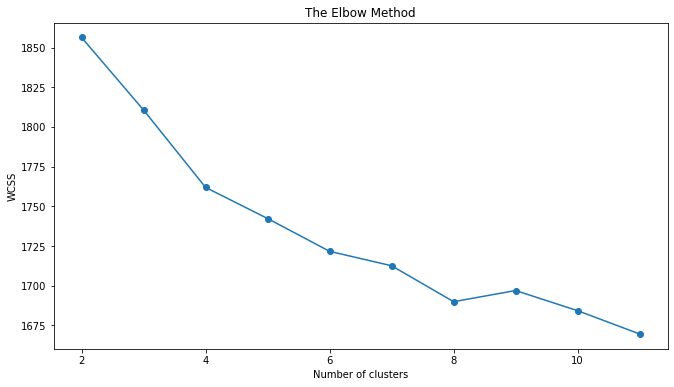

In [ ]:
## ELBOW METHOD

from sklearn.cluster import KMeans
wcss = []
for i in range(2,12):
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 101)
    kmeans.fit(tfidf_vects)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (11,6))
plt.plot(range(2,12), wcss, marker = "o")
plt.title ("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

In [ ]:
#forming 6 clusters
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 6,init='k-means++',max_iter=10000, random_state=50)
model.fit(tfidf_vects)
from collections import Counter
Counter(model.labels_)

Counter({3: 1479, 5: 178, 2: 108, 1: 95, 4: 82, 0: 57})

In [ ]:
# Clusters containing words with maximum strength
top_words = 7
centroids = model.cluster_centers_.argsort()[:, ::-1]
for cluster_num in range(6):
    key_features = [names[i] for i in centroids[cluster_num, :top_words]]
    print('Cluster '+str(cluster_num+1))
    print('Top Words:', key_features)

Cluster 1
Top Words: ['excelente', 'telefono', 'producto', 'bueno', 'muy', 'footage', 'following']
Cluster 2
Top Words: ['good', 'phone', 'product', 'cellphone', 'mobile', 'price', 'thanks']
Cluster 3
Top Words: ['great', 'phone', 'works', 'price', 'product', 'easy', 'use']
Cluster 4
Top Words: ['phone', 'good', 'love', 'nice', 'screen', 'like', 'price']
Cluster 5
Top Words: ['excellent', 'product', 'recommend', 'arrived', 'seller', 'condition', 'thank']
Cluster 6
Top Words: ['work', 'phone', 'waste', 'money', 'sim', 'card', 'would']


In [ ]:
cluster_center=model.cluster_centers_
cluster_center

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.65641860e-05, 6.27831726e-05, 4.55727915e-04, ...,
        1.26658995e-04, 2.16285431e-05, 3.45659724e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

## DBSCAN

In [ ]:
reviews=[]
for i in df['Reviews']:
    reviews.append(str(i).split())
import gensim
w2v_model=gensim.models.Word2Vec(reviews, size=100, workers=4)

import numpy as np
vectors = []
for i in reviews:
    vector = np.zeros(100)
    count = 0
    for word in i:
        try:
            vec = w2v_model.wv[word]
            vector += vec
            count += 1
        except:
            pass
    vector /= count
    vectors.append(vector)  
vectors = np.array(vectors)
vectors = np.nan_to_num(vectors)

In [ ]:
from sklearn.cluster import DBSCAN
minPts = 2 * 100
# Lower bound function
def lower_bound(nums, target): 
    l, r = 0, len(nums) - 1
    # Binary searching
    while l <= r:
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200thnearestneighbour(x, data): 
    dists = []
    for val in data:
      # computing distances
        dist = np.sum((x - val) **2 ) 
        if(len(dists) == 200 and dists[199] > dist): 
            l = int(lower_bound(dists, dist)) 
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()

# Dist 199 contains the distance of 200th nearest neighbour.    
    return dists[199]

vectors.shape

(1999, 100)

In [ ]:
# Computing the 200th nearest neighbour distance of some point the dataset:
twohundrethneigh = []
for val in vectors[:1000]:
    twohundrethneigh.append( compute200thnearestneighbour(val, vectors[:1000]) )
twohundrethneigh.sort()

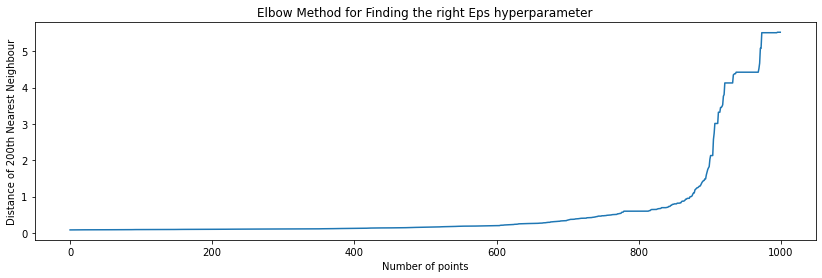

In [ ]:
# Plotting for the Elbow Method :
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

In [ ]:
# Create the model
model_dbs = DBSCAN(eps = 5, min_samples = minPts)
model_dbs.fit(vectors)

DBSCAN(eps=5, min_samples=200)

In [ ]:
df_dbs = df
df_dbs["DBS Cluster Label"] = model_dbs.labels_
df_dbs

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,DBS Cluster Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,feel lucky found used phone used hard phone li...,1.0,0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,nice phone nice grade pantach revue clean set ...,0.0,0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,pleased,0.0,0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,works good goes slow sometimes good phone love,0.0,0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,great phone replace lost phone thing volume bu...,0.0,0
...,...,...,...,...,...,...,...
1994,ALCATEL OneTouch Idol 3 Global Unlocked 4G LTE...,Alcatel,129.00,2,owned device two months left top corner device...,2.0,0
1995,ALCATEL OneTouch Idol 3 Global Unlocked 4G LTE...,Alcatel,129.00,5,amazing phone compares friends galaxy,0.0,0
1996,ALCATEL OneTouch Idol 3 Global Unlocked 4G LTE...,Alcatel,129.00,1,bought phone daughter last june days later sep...,24.0,0
1997,ALCATEL OneTouch Idol 3 Global Unlocked 4G LTE...,Alcatel,129.00,5,excellent phone,1.0,0


## Hierarchical clustering

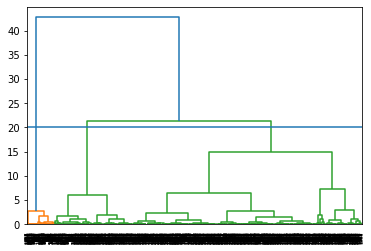

In [ ]:
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(vectors,method='ward'))
plt.axhline(y=20)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  #took n=3 from dendrogram curve 
Agg=cluster.fit_predict(vectors)

In [ ]:
df['AVG-W2V Clus Label'] = cluster.labels_
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,DBS Cluster Label,AVG-W2V Clus Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,feel lucky found used phone used hard phone li...,1.0,0,0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,nice phone nice grade pantach revue clean set ...,0.0,0,0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,pleased,0.0,0,0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,works good goes slow sometimes good phone love,0.0,0,2
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,great phone replace lost phone thing volume bu...,0.0,0,0


In [ ]:
hier_df = df # Give the labels and group to count the number of data in each clusters.
hier_df["Hierarchial Cluster Labels"] = cluster.labels_
hier_df.groupby(["Hierarchial Cluster Labels"])["Reviews"].count()

Hierarchial Cluster Labels
0    1367
1     168
2     464
Name: Reviews, dtype: int64

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.

# KMEANS


K-means clustering is an unsupervised learning approach that groups data that has not been labeled together based on their similarities. It is an iterative procedure that begins with determining K.
Can handle large amount of data
Outliers and noise can be really impactful
Number of clusters need to be decided in the early stage
can create cluster will different sizes.

# DBSCAN

DBSCAN is an abbreviation for density-based spatial clustering of noise-affected applications. This form of clustering may detect not just randomly structured clusters, but also those including outliers. They concentrate on density, and hence their primary goal is to divide high-density regions from low-density areas. K-means clustering is better capable of coping with huge data sets than DBSCAN clustering.
Outliers and noise can be really impactful
It is not required to specify number of clusters at the beginning
can create different size clusters

# HIERARCHIAL CLUSTERING

Data are categorized in hierarchical levels in hierachical clustering. In the beginning, all of the data points are given to their respective cluster. The two nearest clusters are then joined to produce a single cluster. This technique is repeated until only one cluster remains.
Can be slower for large amount of data and expensive to scale
need to specify the number of clusters at the beginning
usually creates same size clusters


### K-means clustering is based on the distance between the data points and the centroids of the clusters themselves. 

### DBSCAN is used to perform clustering that is based on density. Here the areas where the points are concetrated the most are found and are segregated  from empty space. 

### Hierarchical clustering, as the name suggests involves clustering in layers. It begins with considering each data point as a seperate cluster and then finds the two clusters that are closer to each other.